<a href="https://colab.research.google.com/github/pullz6/Star-Classification-with-a-Decision-Tree/blob/main/Star_Prediction_with_a_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing

drive.mount('/content/drive')
df_stars = pd.read_csv('/content/drive/My Drive/sample_data/Projects/6 class csv.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
df_stars = df_stars.reindex(columns=['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)','Absolute magnitude(Mv)','Star color','Spectral Class','Star type'])
df_stars.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class,Star type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [25]:
label_encoder = preprocessing.LabelEncoder()
df_stars['Star color']= label_encoder.fit_transform(df_stars['Star color'])
df_stars['Spectral Class']= label_encoder.fit_transform(df_stars['Spectral Class'])
X = df_stars.values[:, 1:6]
Y = df_stars.values[:, -1]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=100)

In [33]:
y_train

array([4., 0., 4., 2., 4., 3., 2., 5., 2., 5., 3., 1., 0., 1., 1., 5., 1.,
       2., 4., 5., 1., 3., 5., 4., 5., 2., 0., 2., 1., 1., 0., 2., 2., 4.,
       4., 0., 2., 1., 0., 3., 1., 3., 0., 2., 4., 3., 3., 3., 1., 2., 4.,
       5., 1., 4., 5., 4., 5., 3., 5., 3., 3., 2., 0., 5., 1., 2., 3., 3.,
       2., 3., 0., 2., 3., 1., 1., 3., 0., 2., 4., 4., 5., 4., 1., 5., 5.,
       4., 3., 5., 0., 3., 0., 2., 0., 5., 5., 4., 4., 3., 3., 1., 5., 5.,
       3., 2., 5., 5., 1., 0., 3., 4., 1., 4., 5., 4., 1., 1., 5., 5., 0.,
       1., 2., 0., 4., 0., 3., 4., 1., 1., 1., 4., 1., 5., 3., 4., 4., 4.,
       5., 3., 5., 5., 2., 0., 0., 2., 4., 0., 0., 2., 0., 4., 0., 1., 5.,
       4., 1., 5., 0., 3., 0., 4., 2., 0., 3., 1., 4., 3., 1., 2., 3., 1.,
       2., 5., 0., 4., 2., 5., 3., 1., 4., 0., 5., 3., 0., 3., 1., 5., 1.,
       2., 4., 0., 2., 0.])

In [27]:
clf_entropy = DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=5,min_samples_leaf=5)
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=100)

In [28]:
y_pred = clf_entropy.predict(X_test)

In [29]:
print("Accuracy is:",accuracy_score(y_test,y_pred)*100)

Accuracy is: 100.0


In [36]:
feature_names = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)','Absolute magnitude(Mv)','Star color']
target_names = ['0','1','2','3','4','5']

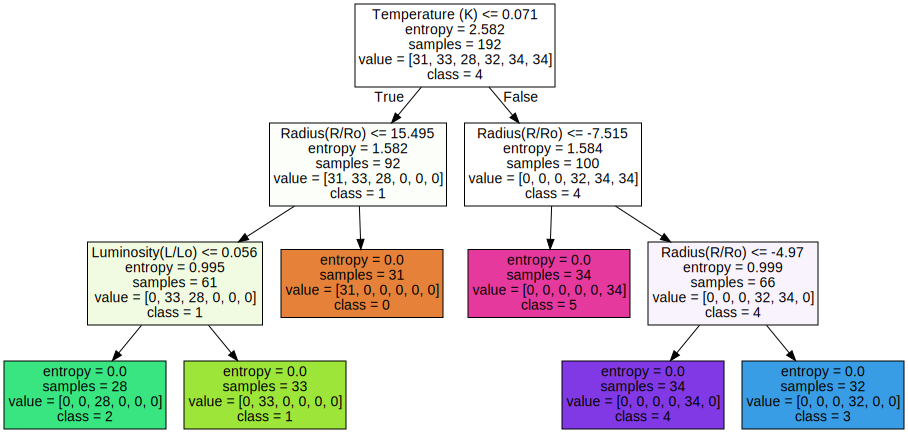

In [37]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf_entropy, out_file=None,
                                feature_names=feature_names,
                                class_names=target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph